In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas import crosstab

In [2]:
df = pd.read_csv(r"C:\Users\harsh\OneDrive\Desktop\data sets\WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.sample(5)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4415,0420-TXVSG,Male,0,Yes,No,66,Yes,Yes,DSL,Yes,...,Yes,No,No,No,Two year,Yes,Credit card (automatic),66.10,4428.45,No
3623,9819-FBNSV,Male,1,Yes,No,37,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),72.25,2575.45,No
5673,6260-XLACS,Male,0,No,No,4,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,No,Mailed check,19.70,117.8,No
4580,0825-CPPQH,Female,0,Yes,No,71,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),19.10,1372.45,No
4013,9667-TKTVZ,Female,0,No,No,2,Yes,Yes,DSL,No,...,No,Yes,No,No,Month-to-month,Yes,Mailed check,54.35,117.05,No


In [3]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [5]:
counts = df["Churn"].value_counts()
counts

Churn
No     5174
Yes    1869
Name: count, dtype: int64

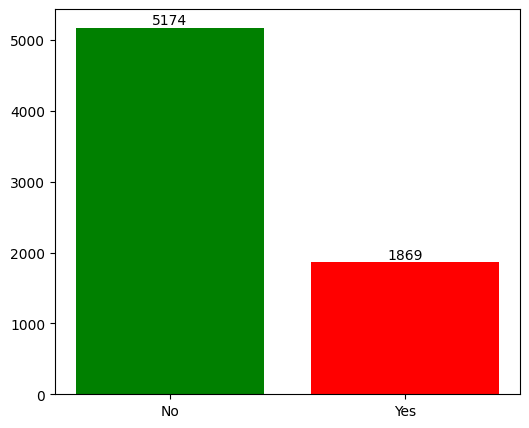

In [6]:
plt.figure(figsize=(6,5))
counts = df["Churn"].value_counts()
l=plt.bar(counts.index,counts.values,color=["green","red"])
plt.bar_label(l)
plt.show()

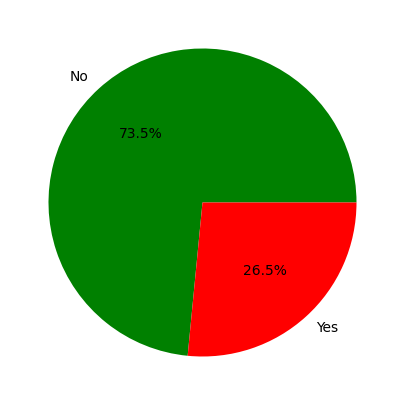

In [7]:
plt.figure(figsize=(6,5))
counts = df["Churn"].value_counts()
p = plt.pie(counts.values,labels=counts.index,colors=["green","red"],autopct='%1.1f%%')
plt.show()

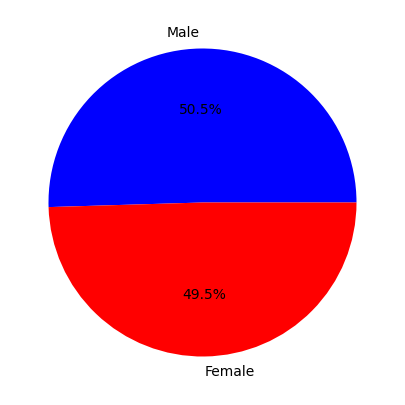

In [8]:
#male vs Female
plt.figure(figsize=(6,5))
counts = df["gender"].value_counts()
plt.pie(counts.values,labels=counts.index,colors=["blue","red"],autopct="%1.1f%%")
plt.show()

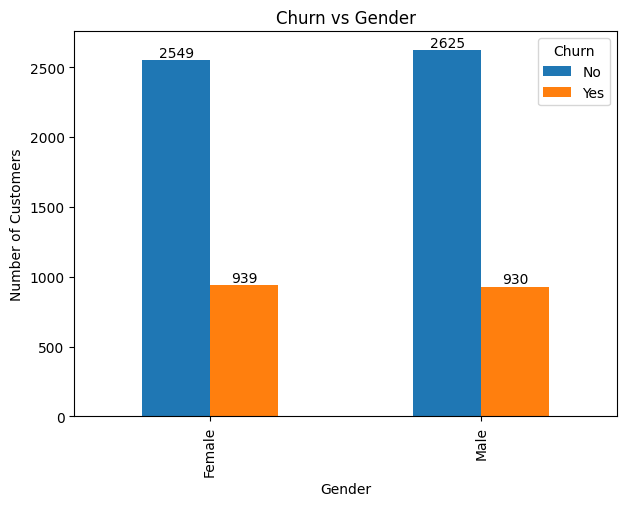

In [9]:
counts = df.groupby('gender')['Churn'].value_counts()
counts = counts.unstack()
l=counts.plot(kind='bar', figsize=(7,5))
plt.title("Churn vs Gender")
plt.xlabel("Gender")
plt.ylabel("Number of Customers")
for i in l.containers:
    l.bar_label(i)
plt.show()
# From this it is clarified that the gender is not that much impact

<Figure size 600x500 with 0 Axes>

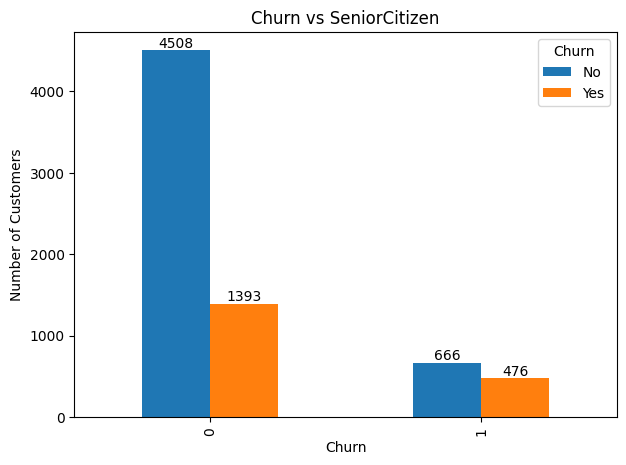

In [10]:
plt.figure(figsize=(6,5))
ct = pd.crosstab(df["SeniorCitizen"],df["Churn"])
l = ct.plot(kind="bar", figsize=(7,5))
for p in l.containers:
    plt.bar_label(p)
plt.title("Churn vs SeniorCitizen")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.show()

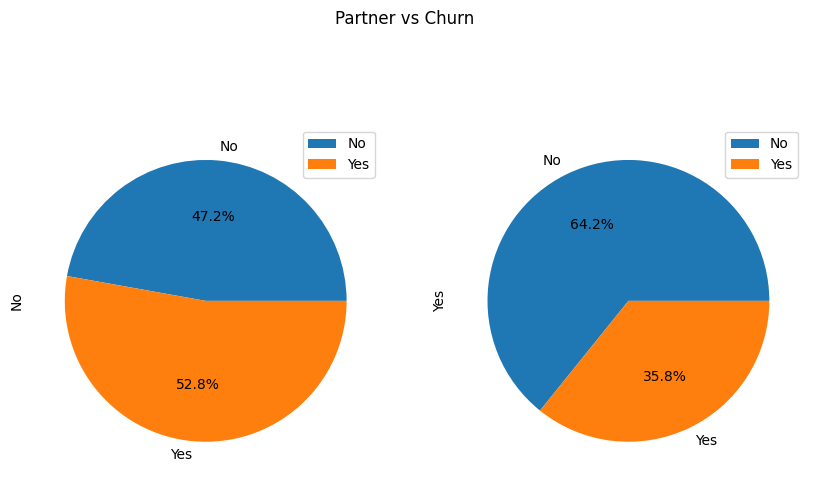

In [11]:
pd.crosstab(df["Partner"], df["Churn"]).plot(
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    figsize=(10,6)
)
plt.suptitle("Partner vs Churn")
plt.show()


In [12]:
pd.crosstab(df["Partner"], df["Churn"])

Churn,No,Yes
Partner,,
No,2441,1200
Yes,2733,669


In [13]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

<Figure size 600x500 with 0 Axes>

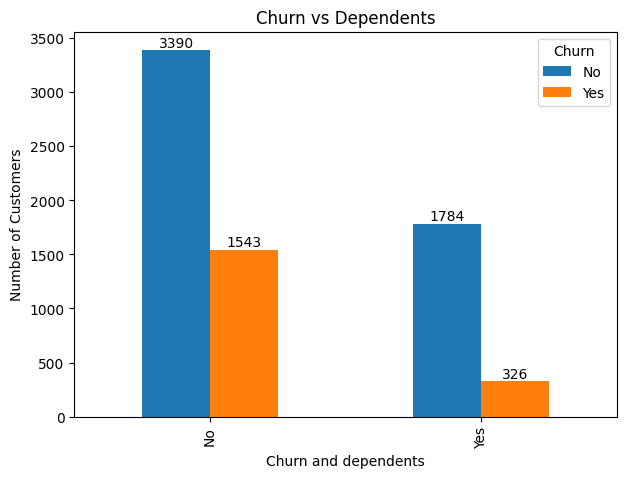

In [14]:
plt.figure(figsize=(6,5))
ct = pd.crosstab(df["Dependents"], df["Churn"])
l = ct.plot(kind="bar", figsize=(7,5))
for p in l.containers:
    plt.bar_label(p)
plt.title("Churn vs Dependents")
plt.xlabel("Churn and dependents")
plt.ylabel("Number of Customers")
plt.show()

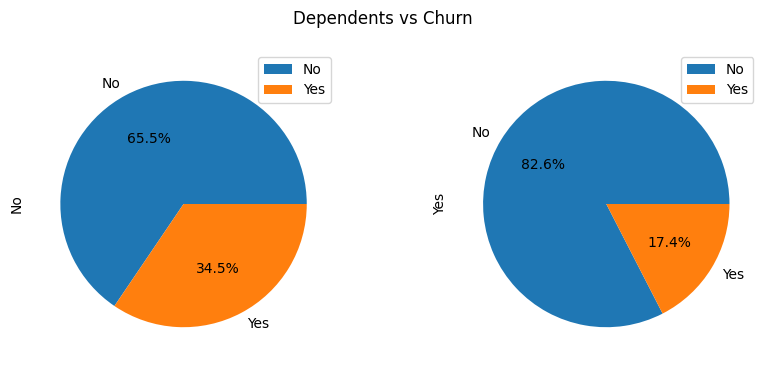

In [15]:
ct = pd.crosstab(df["Dependents"], df["Churn"])
ct.plot(
    kind="pie",
    subplots=True,
    autopct="%1.1f%%",
    figsize=(10,4)
)
plt.suptitle("Dependents vs Churn")
plt.show()


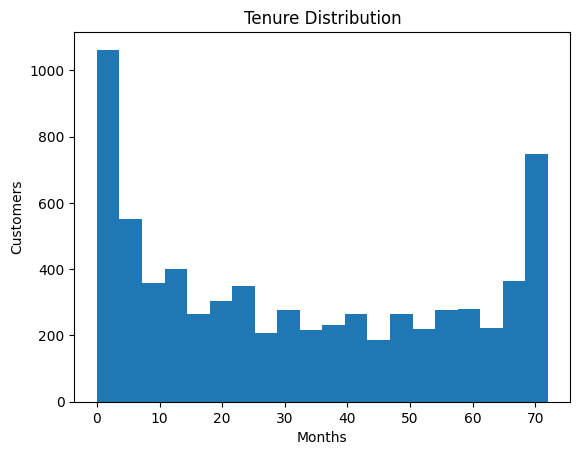

In [16]:
plt.hist(df["tenure"], bins=20)
plt.title("Tenure Distribution")
plt.xlabel("Months")
plt.ylabel("Customers")
plt.show()

In [17]:
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"], errors="coerce")


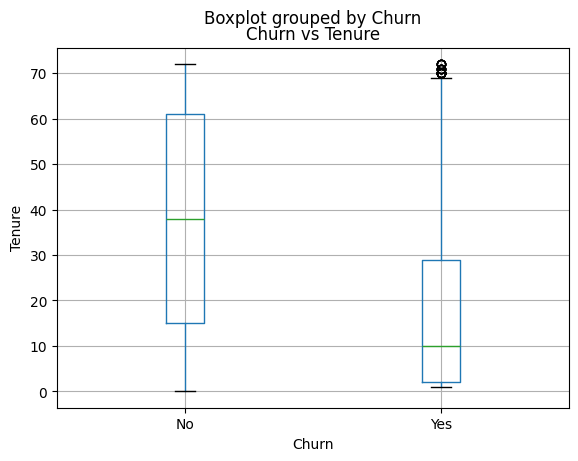

In [18]:
df.boxplot(column="tenure", by="Churn")
plt.title("Churn vs Tenure")
plt.xlabel("Churn")
plt.ylabel("Tenure")
plt.show()

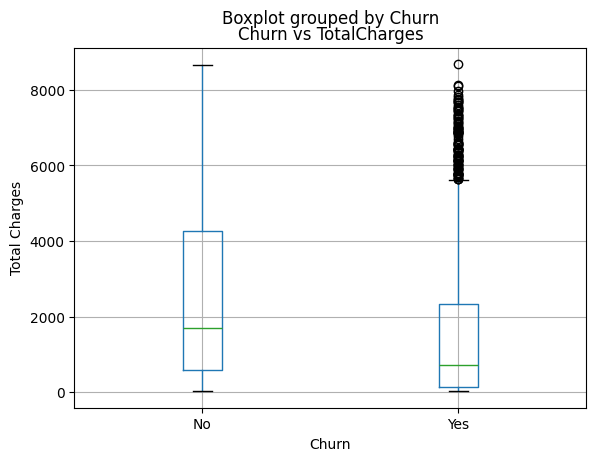

In [19]:
df.boxplot(column="TotalCharges", by="Churn")
plt.title("Churn vs TotalCharges")
plt.xlabel("Churn")
plt.ylabel("Total Charges")
plt.show()

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
count = df["Contract"].value_counts()
count

Contract
Month-to-month    3875
Two year          1695
One year          1473
Name: count, dtype: int64

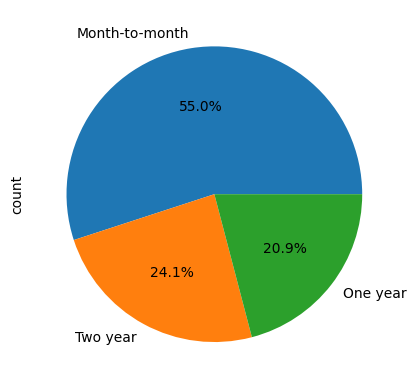

In [22]:
count.plot(kind="pie", autopct="%1.1f%%")
plt.show()


Contract        Churn
Month-to-month  No       2220
                Yes      1655
One year        No       1307
                Yes       166
Two year        No       1647
                Yes        48
Name: count, dtype: int64
Churn             No   Yes
Contract                  
Month-to-month  2220  1655
One year        1307   166
Two year        1647    48


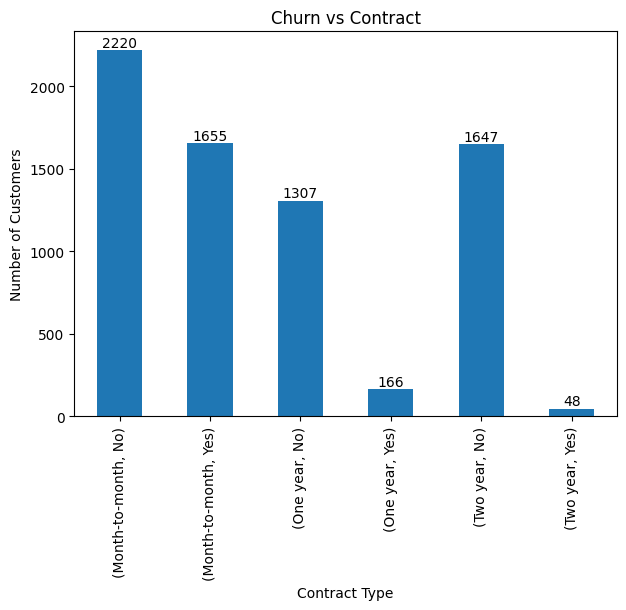

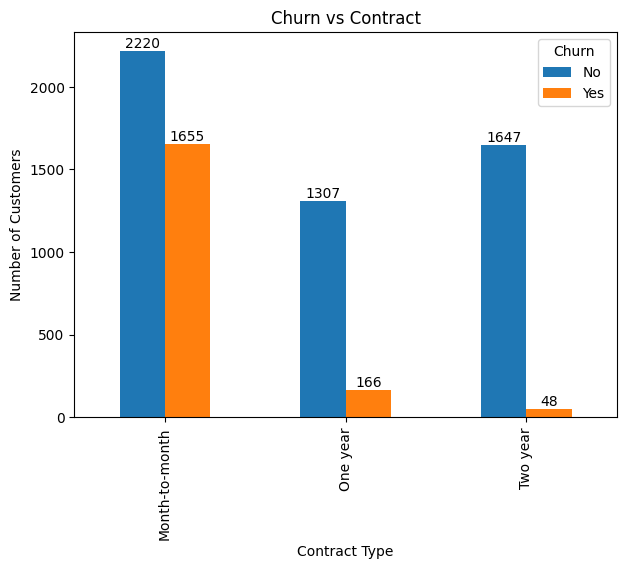

In [23]:
d = df.groupby("Contract")["Churn"].value_counts()
print(d)
s = d.plot(kind="bar", figsize=(7,5))
plt.title("Churn vs Contract")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")

for i in s.containers:
    s.bar_label(i)

d = d.unstack()
print(d)
s = d.plot(kind="bar", figsize=(7,5))

plt.title("Churn vs Contract")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")

for container in s.containers:
    s.bar_label(container)

plt.show()


Text(0, 0.5, 'Number of Customers')

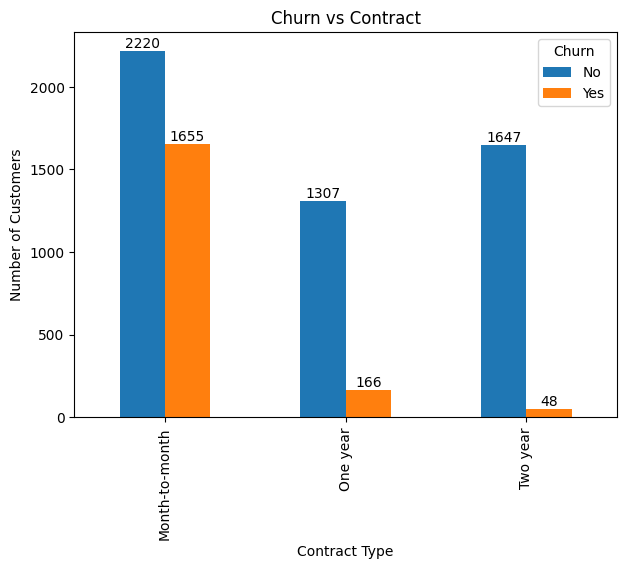

In [24]:
ct = pd.crosstab(df["Contract"], df["Churn"])
a = ct.plot(kind="bar", figsize=(7,5))
for i in a.containers:
    plt.bar_label(i)
plt.title("Churn vs Contract")
plt.xlabel("Contract Type")
plt.ylabel("Number of Customers")


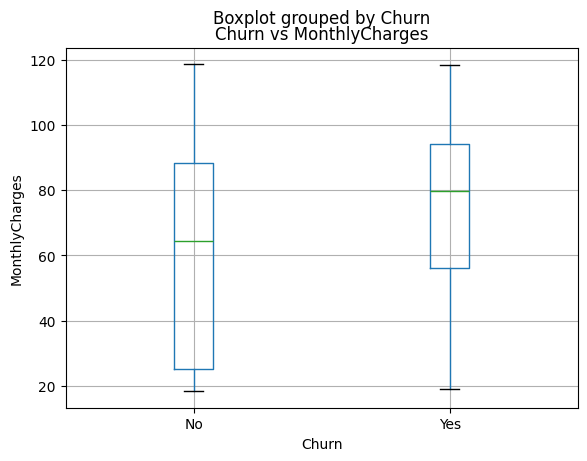

In [25]:
df.boxplot(column="MonthlyCharges", by="Churn")
plt.title("Churn vs MonthlyCharges")
plt.xlabel("Churn")
plt.ylabel("MonthlyCharges")
plt.show()

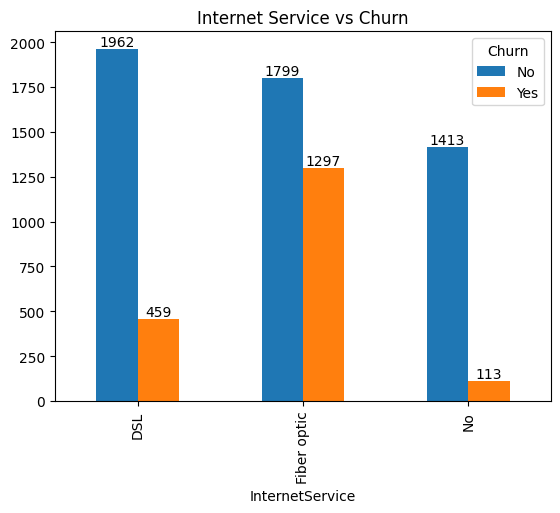

In [26]:
ct = pd.crosstab(df["InternetService"], df["Churn"])
t = ct.plot(kind="bar")
for i in t.containers:
    plt.bar_label(i)
plt.title("Internet Service vs Churn")
plt.show()

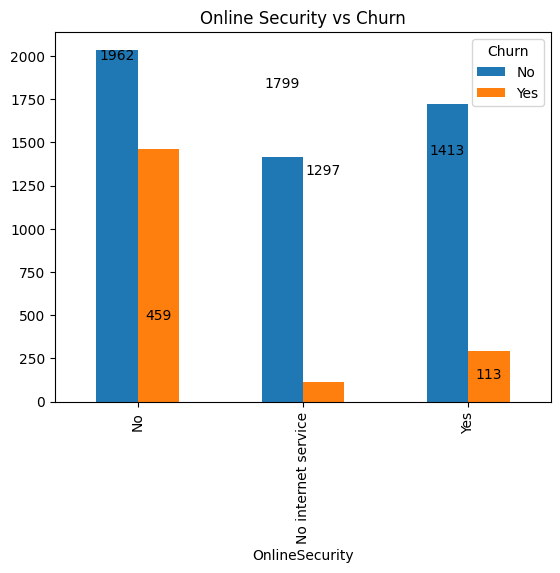

In [27]:

ct = pd.crosstab(df["OnlineSecurity"], df["Churn"]).plot(kind="bar")
for i in t.containers:
    plt.bar_label(i)
plt.title("Online Security vs Churn")
plt.show()

TechSupport          Churn
No                   No       2027
                     Yes      1446
No internet service  No       1413
                     Yes       113
Yes                  No       1734
                     Yes       310
Name: count, dtype: int64


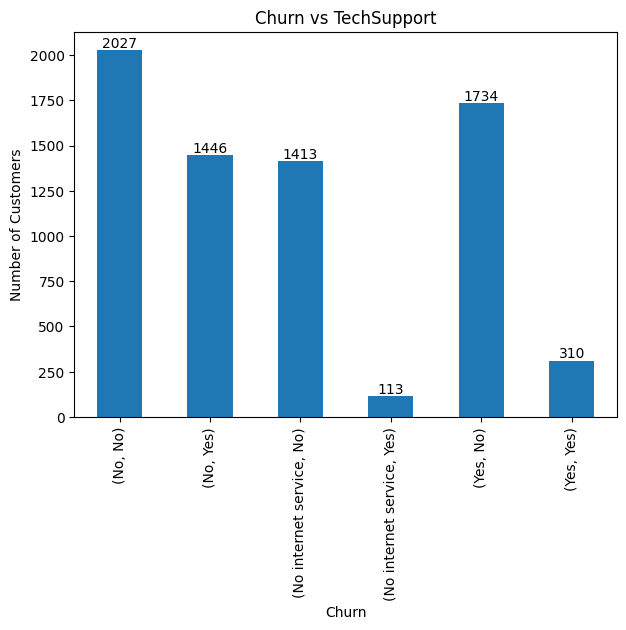

Churn                  No   Yes
TechSupport                    
No                   2027  1446
No internet service  1413   113
Yes                  1734   310


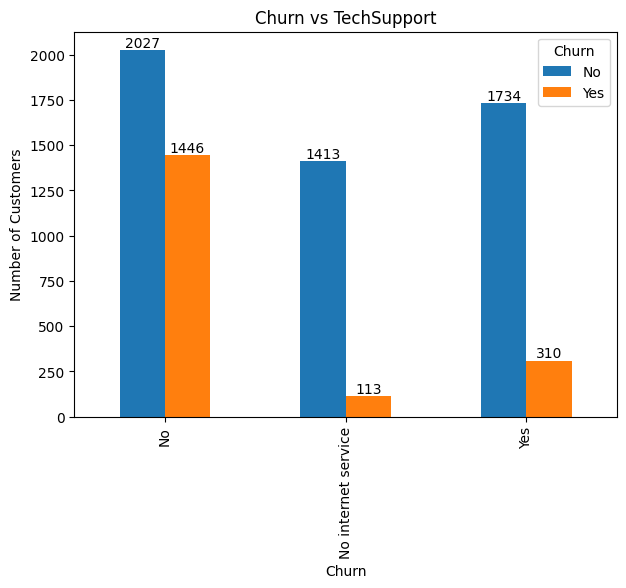

In [28]:
p = df.groupby("TechSupport")["Churn"].value_counts()
print(p)
l = p.plot(kind="bar",
           figsize=(7,5))
plt.title("Churn vs TechSupport")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
for i in l.containers:
    plt.bar_label(i)
plt.show()

p=p.unstack()
print(p)
l = p.plot(kind="bar",
           figsize=(7,5))
plt.title("Churn vs TechSupport")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
for i in l.containers:
    plt.bar_label(i)
plt.show()


In [29]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

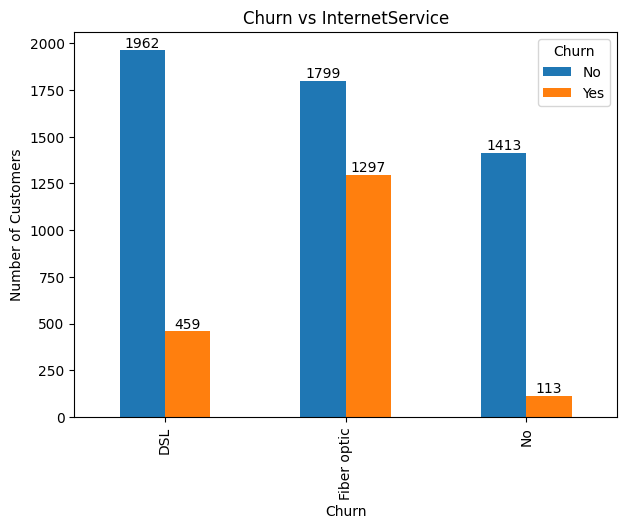

In [30]:
ct = pd.crosstab(df["InternetService"],df["Churn"] )
l = ct.plot(kind="bar",figsize=(7,5))
plt.title("Churn vs InternetService")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
for i in l.containers:
    plt.bar_label(i)
plt.show()

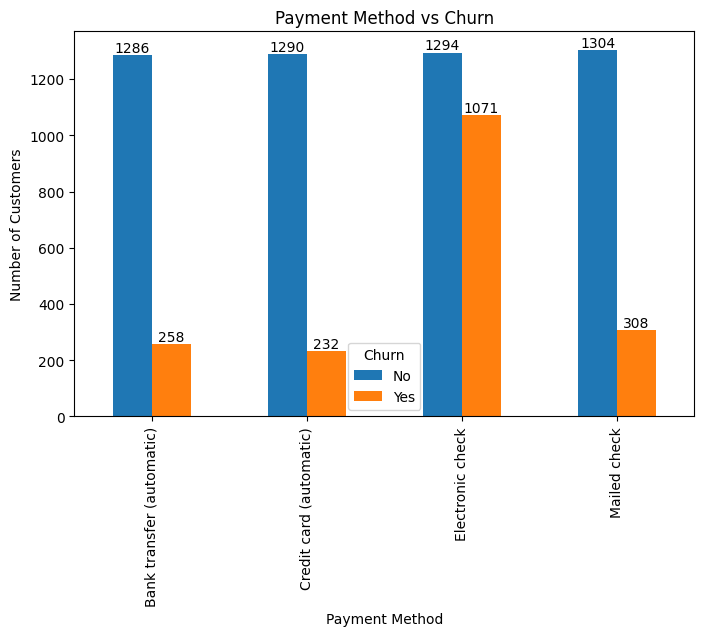

In [31]:
ct = pd.crosstab(df["PaymentMethod"], df["Churn"])

ax = ct.plot(kind="bar", figsize=(8,5))

plt.title("Payment Method vs Churn")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")

for container in ax.containers:
    ax.bar_label(container)

plt.show()

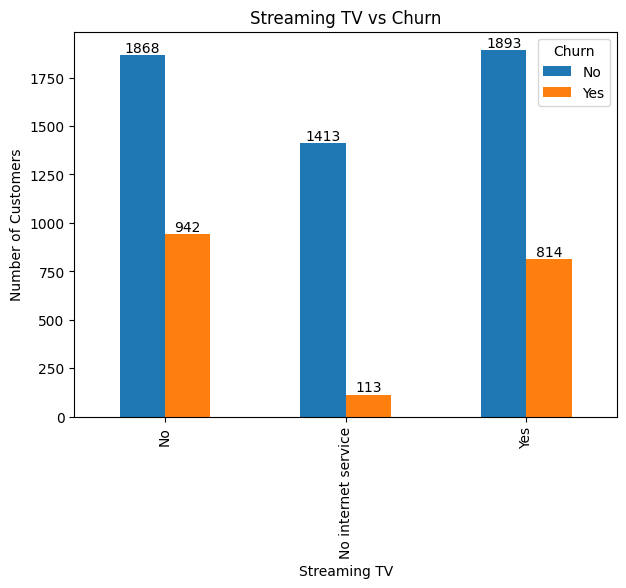

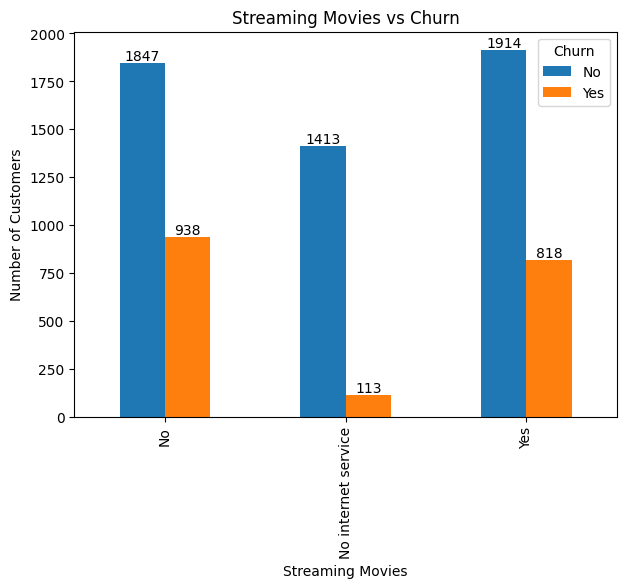

In [32]:
tv = df.groupby("StreamingTV")["Churn"].value_counts().unstack()
l1 = tv.plot(kind="bar", figsize=(7,5))
plt.title("Streaming TV vs Churn")
plt.xlabel("Streaming TV")
plt.ylabel("Number of Customers")
for c in l1.containers:
    l1.bar_label(c)
plt.show()

movies = df.groupby("StreamingMovies")["Churn"].value_counts().unstack()
l2 = movies.plot(kind="bar", figsize=(7,5))
plt.title("Streaming Movies vs Churn")
plt.xlabel("Streaming Movies")
plt.ylabel("Number of Customers")
for c in l2.containers:
    l2.bar_label(c)
plt.show()


In [33]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

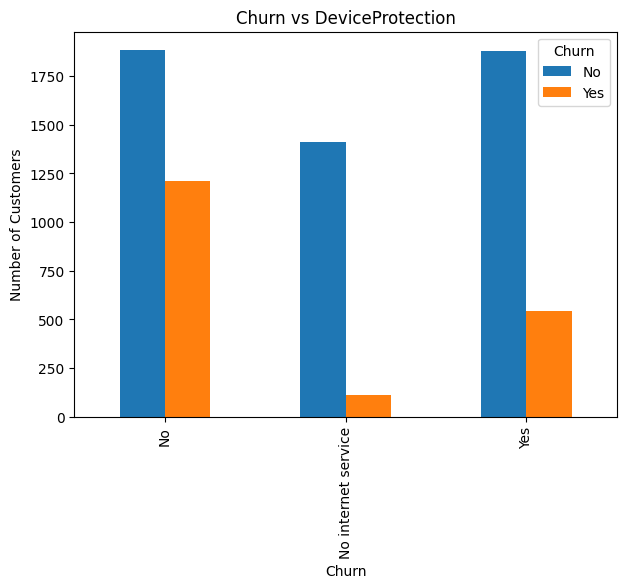

In [34]:
ct = pd.crosstab(df["DeviceProtection"],df["Churn"])
l = ct.plot(kind="bar", figsize=(7,5))
plt.title("Churn vs DeviceProtection")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
for c in l1.containers:
    l1.bar_label(c)
plt.show()


In [41]:
df[["tenure", "MonthlyCharges", "TotalCharges"]].corr()

,tenure,MonthlyCharges,TotalCharges
tenure,1.00000,0.247900,0.825880
MonthlyCharges,0.24790,1.000000,0.651065
TotalCharges,0.82588,0.651065,1.000000


In [40]:
plt.figure(figsize=(11,10))
df[["tenure", "MonthlyCharges", "TotalCharges"]].corr().style.background_gradient(cmap="coolwarm")

,tenure,MonthlyCharges,TotalCharges
tenure,1.000000,0.247900,0.825880
MonthlyCharges,0.247900,1.000000,0.651065
TotalCharges,0.825880,0.651065,1.000000


<Figure size 1100x1000 with 0 Axes>